<a href="https://colab.research.google.com/github/atikaakter/Atika/blob/master/Iris_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species'])


In [ ]:
dataset


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Using pd.Categoical convert species into 0,1,2 code.
#For example: Iris-setosa=0, Iris Versicolour=1, Iris-virginica=2!

dataset['species'] = pd.Categorical(dataset['species']).codes
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#frac= fraction
dataset = dataset.sample(frac=1, random_state=1234)
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
44,5.1,3.8,1.9,0.4,0
110,6.5,3.2,5.1,2.0,2
101,5.8,2.7,5.1,1.9,2
27,5.2,3.5,1.5,0.2,0
17,5.1,3.5,1.4,0.3,0
...,...,...,...,...,...
30,4.8,3.1,1.6,0.2,0
71,6.1,2.8,4.0,1.3,1
97,6.2,2.9,4.3,1.3,1
22,4.6,3.6,1.0,0.2,0


In [ ]:
#[:120,:4] means training set=120 and testing set=30.

train_input = dataset.values[:120, :4]
train_target = dataset.values[:120, 4]
test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]

In [ ]:
import torch

In [ ]:
torch.manual_seed(1234)

hidden_units = 5

net = torch.nn.Sequential(
 torch.nn.Linear(4, hidden_units),
 torch.nn.ReLU(),
 torch.nn.Linear(hidden_units, 3)
)

In [ ]:
#optimizer updates the weights of the network in a way that will reduce the future loss function values.

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [ ]:
# train
#inputs are features of Iris. For example petal length,width etc.
#targets are code of species.

epochs = 50
for epoch in range(epochs):
 inputs =torch.autograd.Variable(torch.Tensor(train_input).float())
 targets =torch.autograd.Variable(torch.Tensor(train_target).long())
 optimizer.zero_grad()
 out = net(inputs)
 loss = criterion(out, targets)
 loss.backward()
 optimizer.step()
 if epoch == 0 or (epoch + 1) % 10 == 0:
  print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))

Epoch 1 Loss: 1.1832
Epoch 10 Loss: 0.6674
Epoch 20 Loss: 0.2537
Epoch 30 Loss: 0.1170
Epoch 40 Loss: 0.0912
Epoch 50 Loss: 0.0820


In [ ]:
import numpy as np

In [ ]:
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())

optimizer.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)

error_count = test_target.size - np.count_nonzero((targets == predicted).numpy())
print('Errors: %d; Accuracy: %d%%' % (error_count, 100 * torch.sum(targets == predicted) / test_target.size))

Errors: 0; Accuracy: 100%


In [ ]:
torch.sum(targets == predicted)

tensor(30)

##**Neural Network for XOR**

In [1]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.colors import ListedColormap

epochs: 0.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 1.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 2.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 3.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 4.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 5.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 6.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 7.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 8.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377

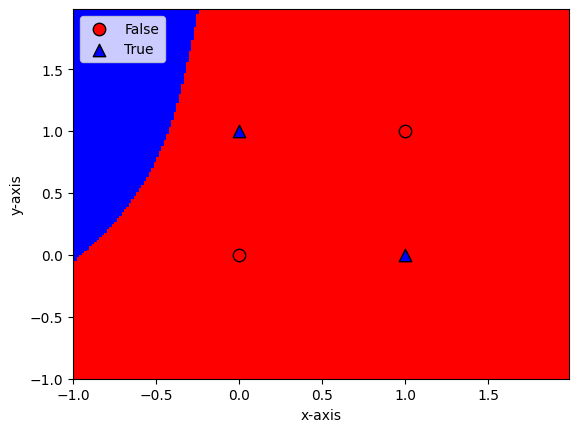

In [8]:
def tanh(x): 
  return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))
def tanh_derivative(x):
 return (1 + tanh(x))*(1 - tanh(x))

class NeuralNetwork:
  def __init__(self, net_arch):
      self.activation_func = tanh
      self.activation_derivative = tanh_derivative
      self.layers = len(net_arch)
      self.steps_per_epoch = 1000
      self.net_arch = net_arch
      self.weights = []
      for layer in range(len(net_arch) - 1):
          w = 2 * numpy.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
          self.weights.append(w)

  def fit(self, data, labels, learning_rate=0.1, epochs=10):
      ones = numpy.ones((1, data.shape[0]))
      Z = numpy.concatenate((ones.T, data), axis=1)
      training = epochs * self.steps_per_epoch
      for k in range(training):
          if k % self.steps_per_epoch == 0:
             print('epochs: {}'.format(k /self.steps_per_epoch))
             for s in data:
                 print(s, nn.predict(s))
      sample = numpy.random.randint(data.shape[0])
      y = [Z[sample]]
      for i in range(len(self.weights) - 1):
          activation = numpy.dot(y[i], self.weights[i])
          activation_f = self.activation_func(activation)
          activation_f = numpy.concatenate((numpy.ones(1),numpy.array(activation_f)))
          y.append(activation_f)

 # last layer
      activation = numpy.dot(y[-1], self.weights[-1])
      activation_f = self.activation_func(activation)
      y.append(activation_f)
 # error for the output layer
      error = labels[sample] - y[-1]
      delta_vec = [error * self.activation_derivative(y[-1])]
 # we need to begin from the back from the next to last layer
      for i in range(self.layers - 2, 0, -1):
          error = delta_vec[-1].dot(self.weights[i][1:].T)
          error = error * self.activation_derivative(y[i][1:])
          delta_vec.append(error)

      delta_vec.reverse()
 # backpropagation
 # 1. Multiply its output delta and input activation
 # to get the gradient of the weight.
 # 2. Subtract a ratio (percentage) of the gradient from the weight
      for i in range(len(self.weights)):
          layer = y[i].reshape(1, nn.net_arch[i] + 1)
          delta = delta_vec[i].reshape(1, nn.net_arch[i + 1])
          self.weights[i] += learning_rate * layer.T.dot(delta)

  def predict(self, x):
      val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
      for i in range(0, len(self.weights)):
          val = self.activation_func(numpy.dot(val, self.weights[i]))
          val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
      return val[1]
  
  def plot_decision_regions(self, X, y, points=200):
      markers = ('o', '^')
      colors = ('red', 'blue')
      cmap = ListedColormap(colors)
      x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 # To produce zoomed-out figures, you can replace thepreceding 2 lines with:
 # x1_min, x1_max = -10, 11
 # x2_min, x2_max = -10, 11
      resolution = max(x1_max - x1_min, x2_max - x2_min) /float(points)
      xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min,x1_max,resolution),numpy.arange(x2_min, x2_max,resolution))
      input = numpy.array([xx1.ravel(), xx2.ravel()]).T
      Z = numpy.empty(0)
      for i in range(input.shape[0]):
          val = nn.predict(numpy.array(input[i]))
          if val < 0.5:
             val = 0
          if val >= 0.5:
             val = 1
          Z = numpy.append(Z, val)
      Z = Z.reshape(xx1.shape)
      plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())
 # plot all samples
      classes = ["False", "True"]
      for idx, cl in enumerate(numpy.unique(y)):
          plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=1.0,c=colors[idx],edgecolors='black',marker=markers[idx],s=80,label=classes[idx])
      plt.xlabel('x-axis')
      plt.ylabel('y-axis')
      plt.legend(loc='upper left')
      plt.show()

nn = NeuralNetwork([2, 5, 1])
if __name__ == '__main__':
    numpy.random.seed(0)
 # Initialize the NeuralNetwork with 2 input, 2 hidden, and 1 output neurons
    nn = NeuralNetwork([2, 4, 1])
    X = numpy.array([[0, 0],[0, 1],[1, 0],[1, 1]])
    y = numpy.array([0, 1, 1, 0])
    nn.fit(X, y, epochs=10)
    print("Final prediction")
    for s in X:
        print(s, nn.predict(s))
    nn.plot_decision_regions(X, y)